In [1]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier,RidgeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC
from tqdm import tqdm
import warnings
import csv
from xgboost import XGBClassifier
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestCentroid
from termcolor import colored



nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')


c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading packa

True

In [2]:
embedding = 'sentence-transformers/all-MiniLM-L6-v2'

# 'BAAI/bge-large-en-v1.5'
# other embeddings: 'sentence-transformers/all-mpnet-base-v2'
# 'sentence-transformers/all-MiniLM-L6-v2'
# 'sentence-transformers/all-MiniLM-L12-v2'

In [356]:
# knn 25

# 'sentence-transformers/all-MiniLM-L6-v2'

# train_set_3103 0.28 0.40 0.67 0.54 | le 4 se fait méchamment confondre avec le 1 dans l'embedding
# train_set_0104 0.34 0.27 0.65 0.51 | 0 et 1 encore (un peu 2 et 5 aussi)
# train_set_0104_30 0.29 0.33 0.62 0.53
# backtrans_train_set 0.30 0.30 0.67 0.54
# backtrans_train_set_30 0.40 0.36 0.66 0.54 | 0 et 1 c'est pas ouf


# 'sentence-transformers/all-mpnet-base-v2'

# backtrans_train_set_30 _ _ 0.65 _ | 0 et 1 c'est pas ouf


# some reflexion need to be made on the data augmentation techniques, and how to improve data quality
# we can also try to change the embedding model

In [8]:
df_train_plus = pd.read_csv("data/dataset_de_mort_and_food_custom.txt",names=['labels','sentences'],sep='\t')
df_train_plus['sentences'] = df_train_plus['sentences'].astype("str")
df_train_plus = df_train_plus[df_train_plus['sentences'].apply(lambda x: len(x.split()) >= 4)]
df_train_plus = df_train_plus.drop_duplicates(subset='sentences').reset_index(drop=True)
df_test = pd.read_csv("data/annotated_test.txt", sep=';',names=['labels','sentences'])
print(df_train_plus.shape,df_test.shape)
df_train_plus.head()

(5283, 2) (200, 2)


,labels,sentences
0,8,"Telescopes peer back in time, revealing the un..."
1,8,Quantum mechanics challenges our understanding...
2,8,Studying fossils unlocks the secrets of ancien...
3,8,Particle accelerators recreate the Big Bang's ...
4,8,Microbiology reveals invisible worlds teeming ...


In [9]:
df_test.labels.value_counts()

labels
6     32
7     19
1     19
2     18
9     17
4     16
5     16
11    15
10    14
8     13
0     11
3     10
Name: count, dtype: int64

### Bordel

In [10]:
test_final = pd.read_csv("data/test_shuffle.txt",sep="\t",names=['sentences'])

In [ ]:
import numpy as np
numbers = [[1, 2, 3,4, 5, 6], [7, 8, 9, 10, 11, 12]]
predicted_probas = np.mean(numbers, axis=0)
np.exp(predicted_probas) / np.sum(np.exp(predicted_probas), axis=1, keepdims=True)


array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

In [4]:
predicted_probas

array([[4., 5., 6.],
       [7., 8., 9.]])

In [18]:
min(test_final.sentences.str.split().apply(len))

6

In [5]:
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestCentroid


def llm_embedding_centroid(model_name, df_train, df_test):
    model = SentenceTransformer(model_name)
    embeddings_test = model.encode(list(df_test["sentences"]))
    embeddings_train = model.encode(list(df_train['sentences']))

    clf = NearestCentroid()
    clf.fit(embeddings_train, df_train['labels'])

    result = clf.predict(embeddings_test)

    return result

model_name = 'sentence-transformers/all-MiniLM-L6-v2'
results = llm_embedding_centroid(model_name, df_train_plus, test_final)

NameError: name 'test_final' is not defined

In [58]:
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestCentroid

model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)
# print(df_test)
embeddings_test = model.encode(list(df_test["sentences"]))
embeddings_train = model.encode(list(df_train_plus['sentences']))

clf = NearestCentroid()
clf.fit(embeddings_train, df_train_plus['labels'])

result = clf.predict(embeddings_test)

In [60]:
df = pd.DataFrame({"predictions":result,"labels":list(df_test['labels']),'sentence':list(df_test['sentences'])})
for elem in df[(df["labels"]==4) & (df["predictions"] == 1)]['sentence']:
    print(elem)


In [23]:
def finetuned_llm(model_name_llm,model_name_classifier, df_train, df_test):
    model_llm = SentenceTransformer(model_name_llm)
    embeddings_test = model_llm.encode(list(df_test["sentences"]))
    embedding_train = model_llm.encode(list(df_train['sentences']))
    # print(embedding_train.shape)
    model_name_classifier.fit(embedding_train,df_train['labels'])
    predicted_label = model_name_classifier.predict(embeddings_test)
    return predicted_label

weights =  {6:95/149,1:95/119,5:95/111,0:95/118,7: 95/97,9: 95/97,10:95/90,2: 95/86,11:95/85,3: 95/72,8: 95/57,4: 95/59}
model_name_classifier = [
                        # XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',n_estimators=20,min_child_weight=2),
                        # RandomForestClassifier(n_estimators=100, random_state=42),
                        SGDClassifier(loss='hinge', penalty='l2',alpha=0.005, random_state=42,class_weight=weights),
                        RidgeClassifier(alpha=10.0, solver="sparse_cg",class_weight=weights)
                        ,LinearSVC(C=0.1, dual=False,class_weight=weights)
                        ] 
    #"mixedbread-ai/mxbai-embed-large-v1" 26 minutes outch                               
for model_name_classifier in tqdm(model_name_classifier):
        # pass
    predicted = finetuned_llm('sentence-transformers/all-MiniLM-L6-v2',model_name_classifier,df_train_plus,df_test)

    # save_prediction(liste_of_preds_llm_finetuned,"mixedbread_xgboost")
    # liste_of_preds_llm_finetuned = load_prediction("mixedbread_xgboost")


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [02:39<00:00, 53.16s/it]


In [24]:
df = pd.DataFrame({"predictions":predicted,"labels":list(df_test['labels']),'sentence':list(df_test['sentences'])})
for elem in df[(df["labels"]==1) & (df["predictions"] == 8)]['sentence']:
    print(elem)

The impact of climate change on human health is a topic of ongoing scientific research.
The impact of air pollution on human health is a topic of ongoing scientific research.
The biotech startup is developing groundbreaking therapies for cancer treatment.
The link between air pollution and respiratory diseases is well established.
The impact of antibiotic resistance on public health is a topic of ongoing scientific research.


In [5]:
import csv
import pandas as pd
# np.mean(results==df_test['labels'])
result_list = [...]  # Your result list

filename = "result.csv"

# Print the updated DataFrame
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile, delimiter=';')  # Set the delimiter to ';'
    writer.writerow(["ID", "Label"])  # Write the column names
    for i, item in enumerate(results):
        writer.writerow([i, item])  # Write each item in results as a row with its line number

NameError: name 'results' is not defined

In [73]:
results==0


array([False, False, False, ..., False, False, False])

In [4]:
def most_common_element(lst):
    counts = {}
    for element in lst:
        if element in counts:
            counts[element] += 1
        else:
            counts[element] = 1
    max_count = max(counts.values())
    most_common_elements = [key for key, value in counts.items() if value == max_count]

    most_common_element = None
    for element in lst:
        if element in most_common_elements:
            most_common_element = element
            break
    
    return most_common_element

In [266]:
# knn approaches are not adding a lot of because the data is not diverse enough

def lemmatize_sentences(sentences):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentences = []

    for sentence in sentences:
        tokens = word_tokenize(sentence)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        lemmatized_sentence = ' '.join(lemmatized_tokens)
        lemmatized_sentences.append(lemmatized_sentence)

    return lemmatized_sentences

# TODO remove punctation
def phrase_sentences(sentences,phrase=None):
    list_tokens = []
    for sentence in sentences:
        list_tokens.append(word_tokenize(sentence)) 
    if phrase is None:
        phrase = Phrases(list_tokens,threshold=10, connector_words=ENGLISH_CONNECTOR_WORDS)
    phraser_model = Phraser(phrase)
    transformed_sentences = [phraser_model[sentence] for sentence in list_tokens]
    return transformed_sentences,phrase

def proprocessing_sentences(sentences,phrase=None):
    lemmatized_sentences = lemmatize_sentences(sentences)
    transformed_sentences,phrase = phrase_sentences(lemmatized_sentences,phrase)
    return transformed_sentences,phrase


In [267]:
df_test.labels.value_counts()
# TODO maybe rebalance the testset?

labels
6     32
1     26
2     19
7     18
9     18
10    15
5     15
11    14
8     13
4     11
3     10
0      9
Name: count, dtype: int64

### tf-idf + classificateur

In [268]:
# Define NLP preprocessing steps
def preprocess_text(X):
    X = X.str.lower().apply(word_tokenize)  # Tokenization
    # X = X.apply(lambda x:[word for word in x if word not in stopwords.words('english')])  # Stopword Removal
    lemmatizer = WordNetLemmatizer()
    X = X.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])  # Lemmatization
    # print(X)
    return X.apply(lambda x:' '.join(x))

pipeline = Pipeline([
    ('preprocess', FunctionTransformer(preprocess_text)),
    ('vectorizer',  TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None))
])

X_train = df_train_plus.loc[:,"sentences"]
y_train = df_train_plus.loc[:,"labels"]

pipeline.fit(X_train, y_train)
predicted_label1 = pipeline.predict(df_test.loc[:,"sentences"])

In [269]:
np.mean(predicted_label1 == df_test.loc[:,"labels"])

0.475

In [270]:
pd.Series(predicted_label1).value_counts()

1     31
5     30
7     26
6     25
10    23
2     20
9     18
11    11
3      9
4      4
8      3
Name: count, dtype: int64

In [271]:
report = classification_report(df_test.loc[:,"labels"],pd.Series(predicted_label1))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.39      0.46      0.42        26
           2       0.60      0.63      0.62        19
           3       0.44      0.40      0.42        10
           4       0.25      0.09      0.13        11
           5       0.47      0.93      0.62        15
           6       0.48      0.38      0.42        32
           7       0.65      0.94      0.77        18
           8       0.33      0.08      0.12        13
           9       0.44      0.44      0.44        18
          10       0.22      0.33      0.26        15
          11       0.82      0.64      0.72        14

    accuracy                           0.48       200
   macro avg       0.42      0.44      0.41       200
weighted avg       0.45      0.47      0.44       200



c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

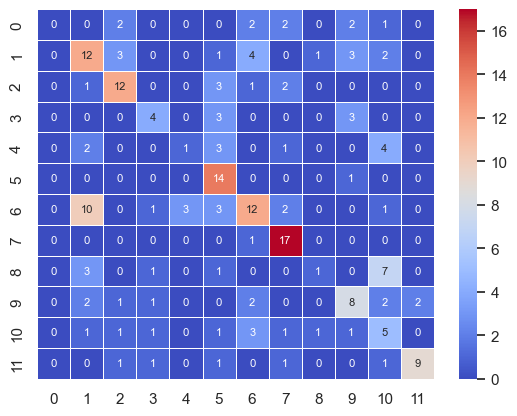

In [272]:
cm = confusion_matrix(df_test.loc[:,"labels"],pd.Series(predicted_label1))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### tf-idf classificateur et countvectorizer

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC

text_clf = Pipeline([
    # ('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")),
    ('clf',RandomForestClassifier()),
])

X_train = df_train_plus.loc[:,"sentences"]
y_train = df_train_plus.loc[:,"labels"]

text_clf.fit(X_train, y_train)
predicted2 = text_clf.predict(df_test.loc[:,"sentences"])
np.mean(predicted2 == df_test.loc[:,"labels"])

0.5

In [63]:
def _preprocess_text(X):
    X = X.str.lower().apply(word_tokenize)  # Tokenization
    # X = X.apply(lambda x:[word for word in x if word not in stopwords.words('english')])  # Stopword Removal
    lemmatizer = WordNetLemmatizer()
    X = X.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])  # Lemmatization
    # print(X)
    return X.apply(lambda x:' '.join(x))

def tf_idf_classifier(df_train,stop_words="english"):
    pipeline = Pipeline([
    ('preprocess', FunctionTransformer(_preprocess_text)),
    ('vectorizer',  TfidfVectorizer(sublinear_tf=True, stop_words=stop_words)),#, max_df=0.5, min_df=5
    ])
    predicted_label = pipeline.fit_transform(df_train.loc[:,"sentences"])
    vectorizer = pipeline.named_steps['vectorizer']
    vocabulary = vectorizer.vocabulary_
    return vocabulary
    

In [9]:
# predicted_label = tf_idf_classifier(df_train_plus,df_test,classifier=SGDClassifier(),stop_words="english")

In [64]:
vocab = tf_idf_classifier(df_train_plus,stop_words="english")

In [72]:
len(sorted(list(vocab.keys())))

3332

In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer(embedding)

c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [65]:
from clean_code.utilities import import_data
theme = ["Politics","Health","Finance","Travel","Food","Education","Environment","Fashion","Science","Sports","Technology","Entertainment"]
embedding_voc= model.encode(list(vocab.keys()))
embedding_theme = model.encode(theme)

results1 = cosine_similarity(embedding_voc,embedding_theme)

In [11]:
def finetuned_llm(model_name_llm,model_name_classifier, df_train, df_test):
    model_llm = SentenceTransformer(model_name_llm)
    embeddings_test = model_llm.encode(list(df_test["sentences"]))
    embedding_train = model_llm.encode(list(df_train['sentences']))
    print(embedding_train.shape)
    model_name_classifier.fit(embedding_train,df_train['labels'])
    predicted_label = model_name_classifier.predict(embeddings_test)
    return predicted_label

model_name_classifier = LinearSVC(C=0.1, dual=False) #SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42)
df_train = df_train_plus

predicited = finetuned_llm(model_name,model_name_classifier, df_train, df_test)

(5192, 384)


In [12]:
np.mean(predicited == df_test['labels'])

0.805

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BiLSTM(nn.Module):

    def __init__(self, pretrained_vectors, num_class, args, dimension=300, freeze_embeddings = False):
        super(BiLSTM, self).__init__()
        self.args = args
        self.embedding = nn.Embedding.from_pretrained(pretrained_vectors.vectors, freeze=freeze_embeddings)
        self.lstm = nn.LSTM(input_size=300,
                            hidden_size=dimension//2, 
                            num_layers=3,
                            batch_first=True,
                            bidirectional=True)
        self.drop = nn.Dropout(p=0.3)
        self.hidden2tag = nn.Linear(dimension, num_class)

    def forward(self, sentence, text_len=12):
        
        embeds = self.embedding.encode(sentence)
        output, hidden = self.lstm(embeds.view(len(sentence), 1, -1))
        output = self.drop(output)
        outputs = self.hidden2tag(output)
        batch_size = outputs.size(0)
        seq_len = outputs.size(1)

        outputs = outputs.view(batch_size*seq_len, -1)
        scores = F.log_softmax(outputs, 1)

        _, tag_seq  = torch.max(scores, 1)
        tag_seq = tag_seq.view(batch_size, seq_len)
        return  scores, tag_seq

In [20]:
from torch.utils.data import DataLoader


def prepare_data(data):
  data = list(data)
  data = [sentence.split() for sentence in data]
  
def train(model,trainset,optimizer, ep, args):
  
  model.train()
  loss_it, acc_it = list(), list()
  for it, batch in tqdm(enumerate(trainset), desc="Epoch %s:" % (ep), total=trainset.__len__()):
    optimizer.zero_grad()
    model.zero_grad()

    logits, tag_seq = model(batch)
    
    if 'class_weights' in args:
        loss_fn = nn.NLLLoss(weight=args['class_weights'])  
    else: 
        loss_fn = nn.NLLLoss()
        
    loss = loss_fn(logits, batch['label'].view(args["b_size"]))

    loss.backward()
    optimizer.step()
    loss_it.append(loss.item())
    
    correct = (tag_seq.flatten() == batch['label'].flatten()).float().sum()
    acc = correct / batch['label'].flatten().size(0)
    acc_it.append(acc.item())

  loss_it_avg = sum(loss_it)/len(loss_it)
  acc_it_avg = sum(acc_it)/len(acc_it)
  
  print("Epoch %s/%s : %s : (%s %s) (%s %s)" % (colored(str(ep), 'blue'),args['max_eps'] , colored('Training', 'blue'), colored('loss', 'cyan'), sum(loss_it)/len(loss_it), colored('acc', 'cyan'), sum(acc_it) / len(acc_it)))


In [21]:
def inference(target, model):
  """
    Args:
      target (str): modify the display, usually either 'validation' or 'test'
  """
  model.eval()

  loss_it, acc_it, f1_it = list(), list(), list()
  preds, trues = list(), list()

  for it, batch in tqdm(enumerate(loader), desc="%s:" % (target), total=loader.__len__()):
    with torch.no_grad():
      loss, logits, tag_seq = model(batch)
      loss_it.append(loss.item())
      
      correct = (tag_seq.flatten() == batch['label'].flatten()).float().sum()
      acc = correct / batch['label'].flatten().size(0)
      acc_it.append(acc.item())
      
      preds.extend(tag_seq.cpu().detach().tolist())
      trues.extend(batch['label'].cpu().detach().tolist())


  loss_it_avg = sum(loss_it)/len(loss_it)
  acc_it_avg = sum(acc_it)/len(acc_it)
  
  # print useful information. Important during training as we want to know the performance over the validation set after each epoch
  print("%s : (%s %s) (%s %s)" % ( colored(target, 'blue'), colored('loss', 'cyan'), sum(loss_it)/len(loss_it), colored('acc', 'cyan'), sum(acc_it) / len(acc_it)))

  # return the true and predicted values with the losses and accuracies
  return trues, preds, loss_it_avg, acc_it_avg, loss_it, acc_it

In [22]:
import torch.optim as optim
from torchtext.vocab import GloVe, vocab, FastText

# pretrained_vectors = GloVe(name="6B", dim='50')
pretrained_vectors = FastText(language='en')

args = {'bsize': 64}
args.update({'max_eps': 10, 'lr': 0.001, 'device': 'cpu', 'cuda': -1, 'seq_len':12, 'num_class': 12})


def run_epochs(model,df_train, args):
  # model_llm = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
  # embedding_train = model_llm.encode(list(df_train['sentences']))
  optimizer = optim.Adam(model.parameters(), lr = args['lr'])
  for ep in range(args['max_eps']):
    train(model,df_train['sentences'], optimizer, ep, args)


model = BiLSTM(pretrained_vectors.vectors, args['num_class'], args, dimension=50, freeze_embeddings = True )
loss_list_val = run_epochs(model, args)
# model_llm = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# embeddings_test = model_llm.encode(list(df_test["sentences"]))
   

.vector_cache\wiki.en.vec: 6.60GB [47:32, 2.31MB/s]                                
100%|██████████| 2519370/2519370 [08:57<00:00, 4688.85it/s] 


AttributeError: 'Tensor' object has no attribute 'vectors'

In [ ]:
# weights =  {6:95/149,1:95/119,5:95/111,0:95/118,7: 95/97,9: 95/97,10:95/90,2: 95/86,11:95/85,3: 95/72,8: 95/57,4: 95/59}
# finetuned_llm('sentence-transformers/all-MiniLM-L6-v2',model_name_classifier,df_train_plus,df_test)

In [66]:
threshold = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
vectors = np.array(results1) 
indices = np.where(np.any(vectors > threshold, axis=1))[0]


In [67]:
np.array(list(vocab.keys()))[indices]

array(['transportation', 'transport', 'transit', 'politically',
       'infrastructure', 'political', 'drive', 'advancement',
       'governmental', 'government', 'art', 'advanced', 'innovation',
       'governance', 'mobility', 'driving', 'development', 'transporter',
       'sailing', 'firm', 'route', 'senator', 'debate', 'elected', 'law',
       'opposition', 'parliamentary', 'examination', 'lawmaking',
       'legislative', 'partisan', 'party', 'fuel', 'feed', 'competitive',
       'aspiring', 'competition', 'publicity', 'electoral', 'ideological',
       'landscape', 'campaign', 'politics', 'partisanship',
       'electioneering', 'language', 'ideology', 'campaigning',
       'television', 'election', 'war', 'politicking', 'environment',
       'compete', 'politician', 'atmosphere', 'climate', 'corruption',
       'diet', 'health', 'physical', 'activity', 'meal', 'wellness',
       'healthy', 'living', 'life', 'nutrition', 'food', 'nutritional',
       'nutrient', 'dietary', 'well

### autre tentative chelou

In [207]:
def phrase_text(text):
    tokens = word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    chunks = nltk.ne_chunk(tagged, binary=False)
    phrases = []
    
    for chunk in chunks:
        if isinstance(chunk, nltk.Tree):
            phrase = ' '.join([word for word, _ in chunk.leaves()])
            phrases.append(phrase)
    
    return phrases

text = "John and Mary went to the park. They had a picnic there."
phrases = phrase_text(text)
print(phrases)

['John', 'Mary']


### tf-idf improved

In [185]:
train,phrase  = proprocessing_sentences(df_train_plus.sentences)
test,_  = proprocessing_sentences(df_test.sentences,phrase)

train =  [" ".join(sentence) for sentence in train]
infer = [" ".join(sentence) for sentence in test]

lemmatize_train = lemmatize_sentences(df_train_plus.sentences)
lemmatize_test = lemmatize_sentences(df_test.sentences)

In [276]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train_plus.loc[:,"sentences"])

query_vec = vectorizer.transform(df_test.loc[:,"sentences"])
results = cosine_similarity(X,query_vec).transpose()
highest_indices = np.argsort(results)[:,-25:]
result = []
for i in range(len(highest_indices)):
    highest_indices[i] = df_train_plus.loc[highest_indices[i],'labels']
    result.append(most_common_element(highest_indices[i]))

In [281]:
np.mean(result==df_test.loc[:,"labels"])

0.295

In [188]:
pd.Series(result).value_counts()

3     43
5     39
10    29
7     17
1     16
9     14
2     13
6     12
11     9
4      5
8      3
Name: count, dtype: int64

In [189]:
report = classification_report(df_test.loc[:,"labels"],pd.Series(result))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.75      0.46      0.57        26
           2       0.62      0.42      0.50        19
           3       0.19      0.80      0.30        10
           4       0.60      0.27      0.37        11
           5       0.31      0.80      0.44        15
           6       0.42      0.16      0.23        32
           7       0.76      0.72      0.74        18
           8       0.33      0.08      0.12        13
           9       0.43      0.33      0.38        18
          10       0.14      0.27      0.18        15
          11       0.67      0.43      0.52        14

    accuracy                           0.39       200
   macro avg       0.43      0.39      0.36       200
weighted avg       0.47      0.39      0.39       200



c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

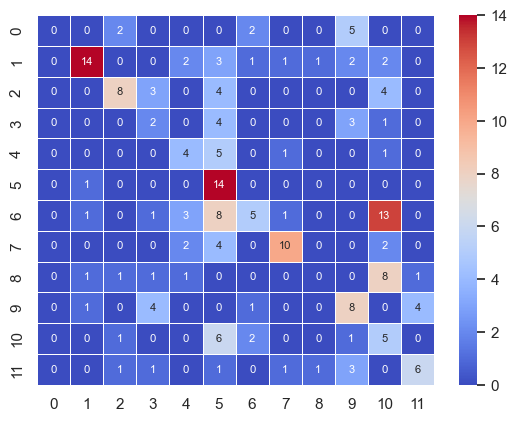

In [182]:
cm = confusion_matrix(df_test.loc[:,"labels"],pd.Series(result))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### Concat tf-idf

In [70]:
grouped_sentences = df_train_plus.groupby('labels')['sentences'].apply(lambda x: ' '.join(x)).reset_index()
lemmatized_sentences = lemmatize_sentences(grouped_sentences["sentences"])

In [73]:
grouped_sentences["sentences"][0]

"A new study reveals the benefits of meditation for mental health. A new study reveals the benefits of meditation for mental health. A new study reveals the benefits of meditation for mental health. Research uncovers the positive effects of contemplation on psychological wellbeing. The research discovers the positive effects of contemplation on psychological well-being. Research reveals the positive effects of contemplation on psychological well-being. Studies reveal the empowering impacts of meditation on mental prosperity. Studies reveal the empowering impacts of meditation on mental prosperity. Studies reveal the impacts of meditation on mental prosperity. Meditating individuals experience uplifting effects on their mental wellbeing. Meditation of individuals experiences edifying effects on their mental well-being. Meditation of individuals has edifying effects on their mental well-being. Meditation can enhance one's mental positivity. Meditation can improve one's mental positivity.

In [305]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(grouped_sentences['sentences'])

In [306]:
query_vec = vectorizer.transform(df_test.loc[:,"sentences"])
results = cosine_similarity(X,query_vec).transpose()
highest_indices = np.argsort(results)[:,-1:]

In [307]:
(grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True)==df_test.loc[:,"labels"]).value_counts()

labels
False    128
True      72
Name: count, dtype: int64

In [308]:
grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True).value_counts()

labels
11    60
3     36
6     29
7     17
1     16
5     14
2     14
9      9
10     4
8      1
Name: count, dtype: int64

In [309]:
report = classification_report(df_test.loc[:,"labels"],grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.62      0.38      0.48        26
           2       0.29      0.21      0.24        19
           3       0.22      0.80      0.35        10
           4       0.00      0.00      0.00        11
           5       0.79      0.73      0.76        15
           6       0.21      0.19      0.20        32
           7       0.94      0.89      0.91        18
           8       0.00      0.00      0.00        13
           9       0.56      0.28      0.37        18
          10       0.75      0.20      0.32        15
          11       0.15      0.64      0.24        14

    accuracy                           0.36       200
   macro avg       0.38      0.36      0.32       200
weighted avg       0.41      0.36      0.35       200



c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

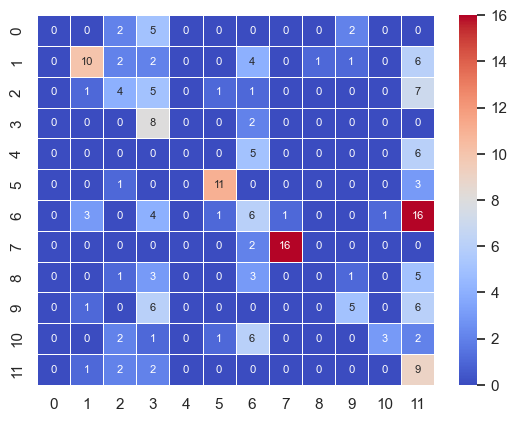

In [310]:
cm = confusion_matrix(df_test.loc[:,"labels"],grouped_sentences.loc[highest_indices.flatten(),'labels'].reset_index(drop=True))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### Embedding

In [283]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer(embedding)

In [284]:
# batch_size=12, normalize_embeddings=True 
embeddings_test = model.encode(list(df_test["sentences"]))
embedding_train = model.encode(list(df_train_plus['sentences']))

results1 = cosine_similarity(embedding_train,embeddings_test).transpose()

In [290]:
highest_indices = np.argsort(results1)[:,-25:]
result1 = []
for i in range(len(highest_indices)):
    highest_indices[i] = df_train_plus.loc[highest_indices[i],'labels']
    result1.append(most_common_element(highest_indices[i]))

In [291]:
np.mean(result1==df_test.labels)

0.635

In [292]:
pd.Series(result1).value_counts()

6     33
5     26
2     25
7     22
9     18
3     17
10    16
4     16
1     12
11     9
8      6
Name: count, dtype: int64

In [293]:
report = classification_report(df_test.loc[:,"labels"],pd.Series(result1))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.83      0.38      0.53        26
           2       0.60      0.79      0.68        19
           3       0.29      0.50      0.37        10
           4       0.44      0.64      0.52        11
           5       0.50      0.87      0.63        15
           6       0.70      0.72      0.71        32
           7       0.82      1.00      0.90        18
           8       0.50      0.23      0.32        13
           9       0.78      0.78      0.78        18
          10       0.62      0.67      0.65        15
          11       1.00      0.64      0.78        14

    accuracy                           0.64       200
   macro avg       0.59      0.60      0.57       200
weighted avg       0.65      0.64      0.62       200



c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

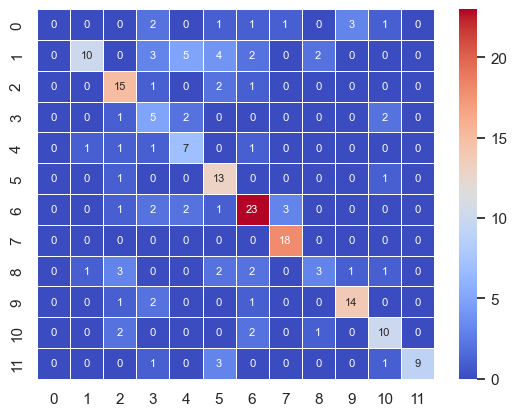

In [294]:
cm = confusion_matrix(df_test.loc[:,"labels"],pd.Series(result1))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### Concat embedding

In [270]:
# TODO this embedding does not take enough enough token to embedded the whole text -> we need another embedfin
# and still cut the texts into smaller parts

In [327]:
grouped_sentences = df_train_plus.groupby('labels')['sentences'].apply(lambda x: ' '.join(x)).reset_index()

In [328]:
embeddings_test = model.encode(list(df_test["sentences"]))
embedding_train = model.encode(list(grouped_sentences['sentences']))

results = cosine_similarity(embedding_train,embeddings_test).transpose()

In [329]:
(grouped_sentences.loc[np.argmax(results,axis=1),"labels"].reset_index(drop=True)==df_test.labels).value_counts()

labels
True     107
False     93
Name: count, dtype: int64

In [330]:
grouped_sentences.loc[np.argmax(results,axis=1),'labels'].reset_index(drop=True).value_counts()

labels
1     38
7     31
6     24
3     23
5     19
8     15
10    14
4     12
2     10
11     8
9      6
Name: count, dtype: int64

In [331]:
report = classification_report(df_test.loc[:,"labels"],grouped_sentences.loc[np.argmax(results,axis=1),"labels"].reset_index(drop=True))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.45      0.65      0.53        26
           2       0.70      0.37      0.48        19
           3       0.26      0.60      0.36        10
           4       0.50      0.55      0.52        11
           5       0.68      0.87      0.76        15
           6       0.67      0.50      0.57        32
           7       0.58      1.00      0.73        18
           8       0.60      0.69      0.64        13
           9       0.67      0.22      0.33        18
          10       0.57      0.53      0.55        15
          11       0.38      0.21      0.27        14

    accuracy                           0.54       200
   macro avg       0.50      0.52      0.48       200
weighted avg       0.54      0.54      0.51       200



c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

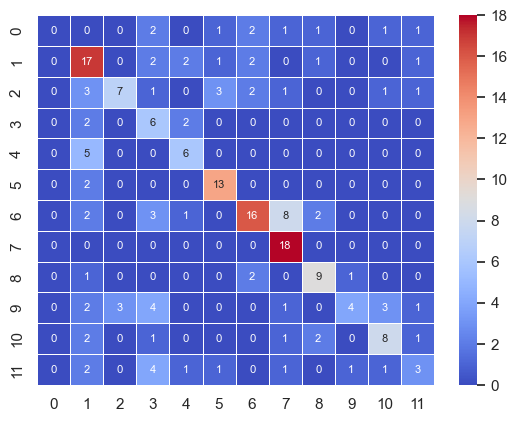

In [332]:
cm = confusion_matrix(df_test.loc[:,"labels"],grouped_sentences.loc[np.argmax(results,axis=1),"labels"].reset_index(drop=True))
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()

### Combine several models

In [301]:

# rank list_of_preds in ascending order according to the confidence that you want to give to the voter
# beforr putting it in the function

def aggregate_voter(list_of_preds,testset):
    assembly_result = []
    for i in range(len(testset)):
        print([voter[i] for voter in list_of_preds],testset[i],print([voter[i] for voter in list_of_preds],testset[i],most_common_element([voter[i] for voter in list_of_preds]))
)
        assembly_result.append(most_common_element([voter[i] for voter in list_of_preds]))
      
    return assembly_result

liste_of_preds = [result1,predicted2,predicted_label1,result]
testset = df_test.loc[:,"labels"]
final_model = aggregate_voter(liste_of_preds,testset)



[2, 2, 2, 5] 2
[6, 2, 1, 1] 6
[2, 2, 10, 10] 8
[2, 2, 2, 5] 2
[8, 7, 10, 5] 10
[10, 7, 7, 8] 10
[2, 2, 5, 11] 2
[3, 2, 6, 8] 2
[7, 7, 7, 5] 7
[5, 2, 5, 5] 11
[4, 2, 10, 10] 1
[11, 2, 11, 11] 11
[10, 10, 10, 10] 10
[7, 7, 7, 5] 7
[11, 2, 11, 11] 11
[5, 5, 5, 5] 5
[4, 2, 10, 10] 4
[8, 2, 8, 1] 8
[6, 4, 4, 10] 6
[3, 1, 1, 4] 1
[7, 2, 6, 10] 0
[6, 6, 6, 6] 6
[6, 2, 1, 1] 6
[3, 1, 9, 11] 3
[5, 9, 1, 1] 1
[5, 2, 3, 9] 11
[9, 9, 9, 7] 0
[11, 2, 11, 5] 11
[11, 2, 2, 2] 11
[6, 6, 6, 1] 6
[3, 1, 7, 11] 11
[10, 5, 9, 10] 5
[9, 2, 2, 10] 0
[2, 2, 2, 5] 2
[8, 2, 10, 10] 8
[3, 2, 2, 5] 9
[7, 7, 7, 10] 7
[2, 2, 2, 2] 2
[6, 2, 1, 11] 6
[5, 2, 10, 10] 0
[4, 10, 9, 11] 3
[5, 11, 11, 5] 11
[10, 3, 3, 3] 3
[6, 6, 6, 6] 6
[3, 3, 3, 3] 6
[9, 2, 9, 7] 9
[3, 2, 5, 5] 3
[2, 2, 5, 5] 10
[8, 3, 3, 3] 8
[6, 6, 6, 6] 6
[4, 2, 10, 4] 4
[5, 2, 5, 5] 5
[10, 3, 3, 10] 3
[11, 11, 11, 11] 11
[6, 6, 6, 5] 10
[4, 9, 9, 9] 1
[9, 3, 10, 9] 9
[10, 10, 10, 10] 10
[9, 2, 1, 1] 9
[9, 9, 9, 9] 9
[5, 5, 5, 5] 5
[1, 2, 2, 2] 1
[5,

In [300]:
report = classification_report(df_test.loc[:,"labels"],pd.Series(final_model))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.50      0.46      0.48        26
           2       0.56      0.79      0.65        19
           3       0.29      0.40      0.33        10
           4       0.31      0.36      0.33        11
           5       0.45      0.93      0.61        15
           6       0.65      0.47      0.55        32
           7       0.82      1.00      0.90        18
           8       0.25      0.08      0.12        13
           9       0.69      0.61      0.65        18
          10       0.31      0.33      0.32        15
          11       0.90      0.64      0.75        14

    accuracy                           0.54       200
   macro avg       0.48      0.51      0.47       200
weighted avg       0.53      0.54      0.52       200



c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

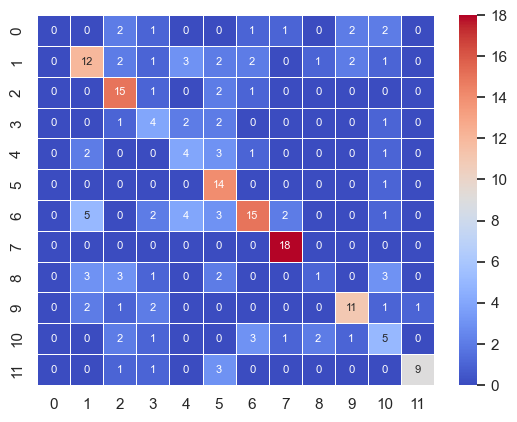

In [299]:
cm = confusion_matrix(df_test.loc[:,"labels"],final_model)
df_cm = pd.DataFrame(cm, index=list(range(12)), columns=list(range(12)))

sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5)
plt.show()